# Using Pandas to preprocess and analyze data

Tutorials are adapted from: 
* https://github.com/jfkominsky/WS19_Python_for_Psychologists BSD 3-Clause License/ Copyright (c) 2019, remayer/dominikkraft. All rights reserved.
* https://github.com/guipsamora/pandas_exercises under BSD 3-Clause License. Copyright (c) 2018, Guilherme Samora. All rights reserved.

More resources:
* https://github.com/justmarkham/pandas-videos

In the previous tutorials, we learned about handling various data types including list, dictionary, and numpy array. However, the actual data does not come with such a simple and clean form, but usually comes with very noisy and complex structure and requires additional cleaning, filtering, and transforming. Pandas has many useful features for this preprocessing. Let's explore!

![pandasUrl](https://media.giphy.com/media/fAaBpMgGuyf96/giphy.gif "pandas")



In [ ]:
# import pandas as pd
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Create Dataframe

Pandas has two basic data structure: ***series* and *dataframe***. A series is just a single column data, and multiple series (multiple columns) makes a dataframe.

In [ ]:
# these s1 and s2 are series 
s1 = pd.Series([3,4,7,8,4,1], name="apples")
s2 = pd.Series([5,9,12,2,9,-99], name="bananas")

print(s1)
print(s2)

0    3
1    4
2    7
3    8
4    4
5    1
Name: apples, dtype: int64
0     5
1     9
2    12
3     2
4     9
5   -99
Name: bananas, dtype: int64


In [ ]:
# indexing works similar to list
s2[5] # get value at the fifth position of s2

-99

In [ ]:
# create dataframe from these series data
fruits= {"apples" : s1, "bananas" : s2} # first we need to arrange our series in a dictionary 
shoppinglist = pd.DataFrame(fruits) # pd.Dataframe(data) conveniently builds a nice looking dataframe for us 

shoppinglist.head(3) # show first 3 rows in our shoppinglist 

,apples,bananas
0,3,5
1,4,9
2,7,12


In [ ]:
# another way to combine two series is to use pd.concat with axis=1 (concatenate along the columns, not rows)
shoppinglist = pd.concat([s1,s2], axis=1)
shoppinglist.tail(3) # show last 3 rows in our shoppinglist 

,apples,bananas
3,8,2
4,4,9
5,1,-99


## Change row index and column names 

As you can see, when you create a dataframe, we have integer numbers on the leftmost column as a default and this denotes the indices of each row. You can customize these indices using `.set_index`. If you want to modify the column names then use `.rename`. 

In [ ]:
# if you want to set customer names who bought fruits as row indicies
customer=["Victoria", "Rhonda", "Elli", "Rebecca", "Lucie", "Isa"]
shoppinglist = shoppinglist.set_index([customer])
shoppinglist

,apples,bananas
Victoria,3,5
Rhonda,4,9
Elli,7,12
Rebecca,8,2
Lucie,4,9
Isa,1,-99


In [ ]:
# if you want to rename index Victoria to Biance
shoppinglist.rename(index = {"Victoria":"Bianca"}, inplace=True)
shoppinglist

,apples,bananas
Bianca,3,5
Rhonda,4,9
Elli,7,12
Rebecca,8,2
Lucie,4,9
Isa,1,-99


In [ ]:
# If you want to change column names, just give dictionary of how the names sholud be changed
shoppinglist.rename(columns={'apples': 'pineapples', 'bananas': 'lemons'}, inplace=True)
shoppinglist

,pineapples,lemons
Bianca,3,5
Rhonda,4,9
Elli,7,12
Rebecca,8,2
Lucie,4,9
Isa,1,-99


In [ ]:
# Or you can just reset the column names 
shoppinglist.columns = ['apples', 'bananas']
shoppinglist

,apples,bananas
Bianca,3,5
Rhonda,4,9
Elli,7,12
Rebecca,8,2
Lucie,4,9
Isa,1,-99


## Add and drop columns and rows

In [ ]:
# if you want to add another column 'plum' to your dataframe
shoppinglist["plums"]= [1,2,3,4,5,6]
shoppinglist

,apples,bananas,plums
Bianca,3,5,1
Rhonda,4,9,2
Elli,7,12,3
Rebecca,8,2,4
Lucie,4,9,5
Isa,1,-99,6


In [ ]:
# if you want to insert a new column to specific location 
shoppinglist.insert(2, "oranges", [1,2,3,4,5,6]) # new col will be inserted into the third column 
shoppinglist

,apples,bananas,oranges,plums
Bianca,3,5,1,1
Rhonda,4,9,2,2
Elli,7,12,3,3
Rebecca,8,2,4,4
Lucie,4,9,5,5
Isa,1,-99,6,6


In [ ]:
# For adding a row, you first need to create a dataframe with a new row and append it to existing one.
norbert = pd.DataFrame([[5,5,-99,4]], columns=shoppinglist.columns.tolist()) ## list(old_dataframe) works also! 
shoppinglist = shoppinglist.append(norbert)
# don't forget to update your row index accordinly
customer=["Bianca", "Rhonda", "Elli", "Rebecca", "Lucie", "Isa", "Norbert"]
shoppinglist = shoppinglist.set_index([customer])
shoppinglist

,apples,bananas,oranges,plums
Bianca,3,5,1,1
Rhonda,4,9,2,2
Elli,7,12,3,3
Rebecca,8,2,4,4
Lucie,4,9,5,5
Isa,1,-99,6,6
Norbert,5,5,-99,4


In [ ]:
# or you can use pd.concat over rows (axis=0 is default)
james = pd.DataFrame([[1,2,3,4]], columns=shoppinglist.columns.tolist()) ## list(old_dataframe) works also! 
shoppinglist = pd.concat([shoppinglist, james])
customer=["Bianca", "Rhonda", "Elli", "Rebecca", "Lucie", "Isa", "Norbert", "James"]
shoppinglist = shoppinglist.set_index([customer])
shoppinglist

,apples,bananas,oranges,plums
Bianca,3,5,1,1
Rhonda,4,9,2,2
Elli,7,12,3,3
Rebecca,8,2,4,4
Lucie,4,9,5,5
Isa,1,-99,6,6
Norbert,5,5,-99,4
James,1,2,3,4


In [ ]:
# to drop your Bianca row
shoppinglist = shoppinglist.drop(index=["Bianca"]) 
shoppinglist

,apples,bananas,oranges,plums
Rhonda,4,9,2,2
Elli,7,12,3,3
Rebecca,8,2,4,4
Lucie,4,9,5,5
Isa,1,-99,6,6
Norbert,5,5,-99,4
James,1,2,3,4


In [ ]:
# to drop your plums columns
shoppinglist = shoppinglist.drop(columns=["plums"]) 
shoppinglist

,apples,bananas,oranges
Rhonda,4,9,2
Elli,7,12,3
Rebecca,8,2,4
Lucie,4,9,5
Isa,1,-99,6
Norbert,5,5,-99
James,1,2,3


## Indexing 

In [ ]:
# access columns by their names (use list)
shoppinglist[["apples", "bananas"]]

,apples,bananas
Rhonda,4,9
Elli,7,12
Rebecca,8,2
Lucie,4,9
Isa,1,-99
Norbert,5,5
James,1,2


Try to only show what one customer bought at the Wochenmarkt using "str-slicing":


In [ ]:
# access rows by their names (using slicing)
shoppinglist["Rhonda":"Elli"]

,apples,bananas,oranges
Rhonda,4,9,2
Elli,7,12,3


In [ ]:
# you can also access rows by integer slicing
shoppinglist[0:2]

,apples,bananas,oranges
Rhonda,4,9,2
Elli,7,12,3


In [ ]:
# access both rows and columns using dataframe.loc[row_selection,column_selection]
shoppinglist.loc[["Isa","Elli","Norbert"], ["bananas", "oranges"]] 

,bananas,oranges
Isa,-99,6
Elli,12,3
Norbert,5,-99


In [ ]:
# or you can also access both rows and columns using integer numbers using .iloc itead of .loc
shoppinglist.iloc[[0,1],[0,1]] # access first two rows and columns;  same as shoppinglist.iloc[0:2,0:2]  

,apples,bananas
Rhonda,4,9
Elli,7,12


## Filtering & Sorting 

Some of you might have noticed that our data has some negative consumption values (-99) which do not make sense! In practice, -99 often denotes the missing values. Let's find where the missing value locates using boolean filtering. 

In [ ]:
# get boolean indexing of negatvie values in the column bananas
cond = shoppinglist["bananas"] <0
print(cond)

Rhonda     False
Elli       False
Rebecca    False
Lucie      False
Isa         True
Norbert    False
James      False
Name: bananas, dtype: bool


In [ ]:
# using this boolean index for selecting the relevant rows.
shoppinglist.loc[cond]

,apples,bananas,oranges
Isa,1,-99,6


In [ ]:
# You can also combine two or more conditional statements
cond = (shoppinglist["bananas"] < 0) | (shoppinglist["oranges"] < 0) # | denotes OR operation, and & denotes AND
shoppinglist.loc[cond]

,apples,bananas,oranges
Isa,1,-99,6
Norbert,5,5,-99


In [ ]:
# Replace -99 with np.nan (not a number values), so that they can be ignored in later analysis
shoppinglist = shoppinglist.replace(-99, np.nan)

In [ ]:
# sort values by specific column (default is increasing order; ascending = True)
shoppinglist.sort_values(by = "oranges", ascending = False) #decreasing

,apples,bananas,oranges
Isa,1,NaN,6.0
Lucie,4,9.0,5.0
Rebecca,8,2.0,4.0
Elli,7,12.0,3.0
James,1,2.0,3.0
Rhonda,4,9.0,2.0
Norbert,5,5.0,NaN


## Transform data
Sometimes you want to transform the data into different units and format. In such case, you can use `.apply()`. It's very similar to filter method you learned from numpy tutorial. 

In [ ]:
# if you want to categorize people into two groups based on how many bananas they bought
def more_than_five(x):
    if x > 5:
        return 'A'
    else:
        return 'B'

shoppinglist['bananas'].apply(more_than_five)

Rhonda     A
Elli       A
Rebecca    B
Lucie      A
Isa        B
Norbert    B
James      B
Name: bananas, dtype: object

In [ ]:
# you can insert this resulted series into new column 'type'
shoppinglist['type'] = shoppinglist['bananas'].apply(more_than_five)
shoppinglist

,apples,bananas,oranges,type
Rhonda,4,9.0,2.0,A
Elli,7,12.0,3.0,A
Rebecca,8,2.0,4.0,B
Lucie,4,9.0,5.0,A
Isa,1,NaN,6.0,B
Norbert,5,5.0,NaN,B
James,1,2.0,3.0,B


In [ ]:
# you can also use lambda function
double = lambda x: x*2
shoppinglist['bananas'].apply(double) #double the banana consumption

Rhonda     18.0
Elli       24.0
Rebecca     4.0
Lucie      18.0
Isa         NaN
Norbert    10.0
James       4.0
Name: bananas, dtype: float64

## Descriptive Statistics
Pandas offers various methods to get an overview of your data e.g., mean, count, sum etc

In [ ]:
# first of all, you can get the summarized data using .describe
shoppinglist.describe() 
# note we have 6 entries for both banana and orange columns since we have one NA for each

,apples,bananas,oranges
count,7.000000,6.000000,6.000000
mean,4.285714,6.500000,3.833333
std,2.690371,4.135215,1.471960
min,1.000000,2.000000,2.000000
25%,2.500000,2.750000,3.000000
50%,4.000000,7.000000,3.500000
75%,6.000000,9.000000,4.750000
max,8.000000,12.000000,6.000000


In [ ]:
# you can calculate how many A and B customer types are there
shoppinglist['type'].value_counts()

B    4
A    3
Name: type, dtype: int64

In [ ]:
# to get min/max number of banana consumption
minb = shoppinglist['bananas'].min()
maxb = shoppinglist['bananas'].max()
print('min is {} and max is {}'.format(minb, maxb))

min is 2.0 and max is 12.0


In [ ]:
# to get mean/median/sum value of banana consumpton
mean = shoppinglist['bananas'].mean()
median = shoppinglist['bananas'].median()
summ = shoppinglist['bananas'].sum()

print('mean is {} and median is {} and sum is {}'.format(mean, median, summ))

mean is 6.5 and median is 7.0 and sum is 39.0


## Grouping
Imagine you are interested how fruit comsumptions are different depending on the customer's type A and B. You can group the data easily using `.groupby()`

In [ ]:
# get average fruit consumptions for type A and B
shoppinglist.groupby('type').mean()

,apples,bananas,oranges
type,,,
A,5.00,10.0,3.333333
B,3.75,3.0,4.333333


In [ ]:
# get count/mean/sum fruit consumptions for type A and B
shoppinglist.groupby('type').agg(['count', 'mean', 'sum'])

apples           bananas             oranges                
      count  mean sum   count  mean   sum   count      mean   sum
type                                                             
A         3  5.00  15       3  10.0  30.0       3  3.333333  10.0
B         4  3.75  15       3   3.0   9.0       3  4.333333  13.0

## Visualization
Pandas even provide a simple visualzation tool for exploring data!

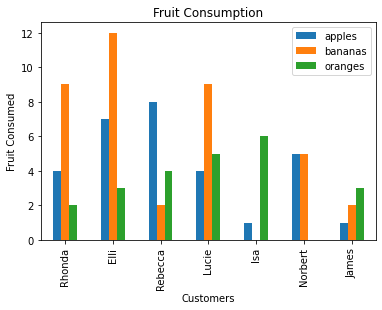

In [ ]:
# create the plot
shoppinglist.plot(kind='bar')

# Set the title and labels
plt.xlabel('Customers')
plt.ylabel('Fruit Consumed')
plt.title('Fruit Consumption')

# show the plot
plt.show()

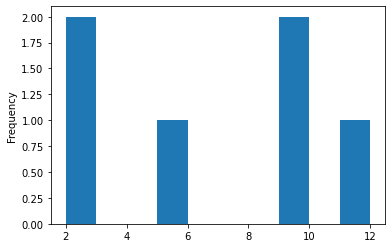

In [ ]:
shoppinglist.bananas.plot(kind='hist')

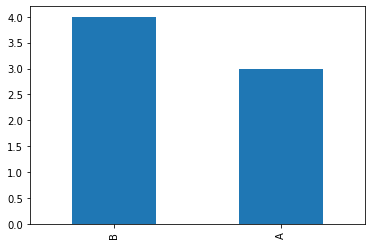

In [ ]:
shoppinglist.type.value_counts().plot(kind='bar')

## Other useful features that Pandas provides
* .merge, .join, .concat: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
* .str : https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html
* pivot table: https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html
* `pandas_profiling` is the package that help profiling pandas dataframe

# Exercise 

## Q1. Explore Movies Dataset
Below you have dataframe called 'movies' which contains several information on movies. In this and the following exercise, we will explore this dataset. As a first step, please answer how many movies are included in the dataset and show the first 10 rows of Movies dataframe.

Hint: Must use `.nunqiue()` which counts unique elements in given column

In [ ]:
#download movies dataset
import pandas as pd
movies = pd.read_csv('http://bit.ly/imdbratings')

In [ ]:
n_movies = pd.DataFrame(movies)
print(n_movies['title'].nunique())
display(n_movies.head(10))

975


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


## Q2. Visualize your data
You want to know what how many genre exist and how they are distributed in the dataset. Please use visualization tool that pandas offer (hint: .value_counts().plot(kind='bar')) and answer what genre appears the most/least frequently in the dataset


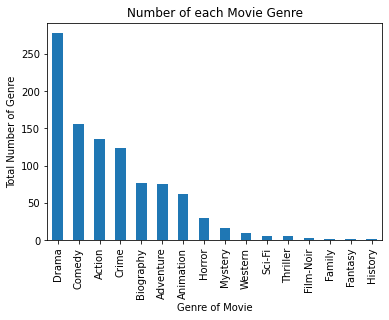

In [ ]:
# Your implementation here
import matplotlib.pyplot as plt

n_movies['genre'].value_counts().plot(kind='bar')
plt.xlabel('Genre of Movie')
plt.ylabel('Total Number of Genre')
plt.title('Number of each Movie Genre')
plt.show()

  

## Q3. Get star ratings by genre
Please calculate the average star ratings by different movie genre (hint: use groupby)

In [ ]:
# Your implementation here
n_movies.groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family       7.850000
Fantasy      7.700000
Film-Noir    8.033333
History      8.000000
Horror       7.806897
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64

## Q4. Transform the star ratings into zscore
Please create a new column under the name 'zscore' which has standardized values of star ratings. Hint: use lambda x: (x - x.mean()) / x.std()

In [ ]:
zscore = lambda x: (x - x.mean())/x.std()
movies['star_rating'].transform(zscore)
#difference between transform and apply is that apply inputs a DataFrame and outputs a Series, DataFrame,
#numpy array or list. Transform inputs series and returns a sequence in the same length of the group.
#Array is used to aggregate values

0      4.196201
1      3.898644
2      3.601086
3      3.303528
4      3.005971
         ...   
974   -1.457394
975   -1.457394
976   -1.457394
977   -1.457394
978   -1.457394
Name: star_rating, Length: 979, dtype: float64

## Q5. Get a list of movies that meets a certain criterion
Get a list of movies that has duration under 70 (hint: boolean index)

In [ ]:
## your implementation
less_than_70 = n_movies["duration"] <70
n_movies.loc[less_than_70]

,star_rating,title,content_rating,genre,duration,actors_list
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
